In [214]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [216]:
# Load your data
df = pd.read_csv(r"C:\Users\marlo\OneDrive\Desktop\adult (1)\adult.datasetv4.csv")
df.head()

,Education_level,Marriage_status,Race,Income
0,Bachelors,Never-married,White,<=50K
1,Bachelors,Married-civ-spouse,White,<=50K
2,HS-grad,Divorced,White,<=50K
3,11th,Married-civ-spouse,Black,<=50K
4,Bachelors,Married-civ-spouse,Black,<=50K


In [218]:
# Define education level mapping to simplify categories
education_mapping = {
    "preschool": "primary education",
    "1st-4th": "primary education",
    "5th-6th": "primary education",
    "7th-8th": "secondary education",
    "9th": "secondary education",
    "10th": "secondary education",
    "11th": "secondary education",
    "12th": "secondary education",
    "hs-grad": "secondary education",
    "some-college": "some college",
    "assoc-acdm": "some college",
    "assoc-voc": "some college",
    "bachelors": "undergraduate degree",
    "masters": "postgraduate degree",
    "doctorate": "postgraduate degree",
    "prof-school": "postgraduate degree"
}


# Apply education level mapping and create a binary married column
df["Education_level"] = df["Education_level"].str.strip().str.lower()
df["Simplified_Education_level"] = df["Education_level"].map(education_mapping)

# Step 1: Standardize text by stripping whitespace and converting to lowercase
df["Marriage_status"] = df["Marriage_status"].str.strip().str.lower()
df["Income"] = df["Income"].str.strip().str.lower()
df["Race"] = df["Race"].str.strip().str.lower()

# Step 2: Define the married statuses, ensuring they match the standardized text
married_statuses = ["married-civ-spouse", "married-spouse-absent", "married-af-spouse"]

# Step 3: Apply the lambda function to classify 'Married' status and "Income" status
df["Married"] = df["Marriage_status"].apply(lambda x: 1 if x in married_statuses else 0)
df["Over_50k"] = df["Income"].apply(lambda x: 1 if x in ">50k" else 0)
df

,Education_level,Marriage_status,Race,Income,Simplified_Education_level,Married,Over_50k
0,bachelors,never-married,white,<=50k,undergraduate degree,0,0
1,bachelors,married-civ-spouse,white,<=50k,undergraduate degree,1,0
2,hs-grad,divorced,white,<=50k,secondary education,0,0
3,11th,married-civ-spouse,black,<=50k,secondary education,1,0
4,bachelors,married-civ-spouse,black,<=50k,undergraduate degree,1,0
...,...,...,...,...,...,...,...
32556,assoc-acdm,married-civ-spouse,white,<=50k,some college,1,0
32557,hs-grad,married-civ-spouse,white,>50k,secondary education,1,1
32558,hs-grad,widowed,white,<=50k,secondary education,0,0
32559,hs-grad,never-married,white,<=50k,secondary education,0,0


In [220]:
# Label encode education level and one-hot encode race for use in the decision tree
le_education = LabelEncoder()
le_income = LabelEncoder()
le_race = LabelEncoder()
df["Education_Pedigree"] = le_education.fit_transform(df["Simplified_Education_level"])
df["Race_Diversity"] = le_education.fit_transform(df["Race"])
df

,Education_level,Marriage_status,Race,Income,Simplified_Education_level,Married,Over_50k,Education_Pedigree,Race_Diversity
0,bachelors,never-married,white,<=50k,undergraduate degree,0,0,4,4
1,bachelors,married-civ-spouse,white,<=50k,undergraduate degree,1,0,4,4
2,hs-grad,divorced,white,<=50k,secondary education,0,0,2,4
3,11th,married-civ-spouse,black,<=50k,secondary education,1,0,2,2
4,bachelors,married-civ-spouse,black,<=50k,undergraduate degree,1,0,4,2
...,...,...,...,...,...,...,...,...,...
32556,assoc-acdm,married-civ-spouse,white,<=50k,some college,1,0,3,4
32557,hs-grad,married-civ-spouse,white,>50k,secondary education,1,1,2,4
32558,hs-grad,widowed,white,<=50k,secondary education,0,0,2,4
32559,hs-grad,never-married,white,<=50k,secondary education,0,0,2,4


In [222]:
df = df.drop(columns=['Simplified_Education_level', 'Income', 'Education_level', 'Race', 'Marriage_status'])
df

,Married,Over_50k,Education_Pedigree,Race_Diversity
0,0,0,4,4
1,1,0,4,4
2,0,0,2,4
3,1,0,2,2
4,1,0,4,2
...,...,...,...,...
32556,1,0,3,4
32557,1,1,2,4
32558,0,0,2,4
32559,0,0,2,4


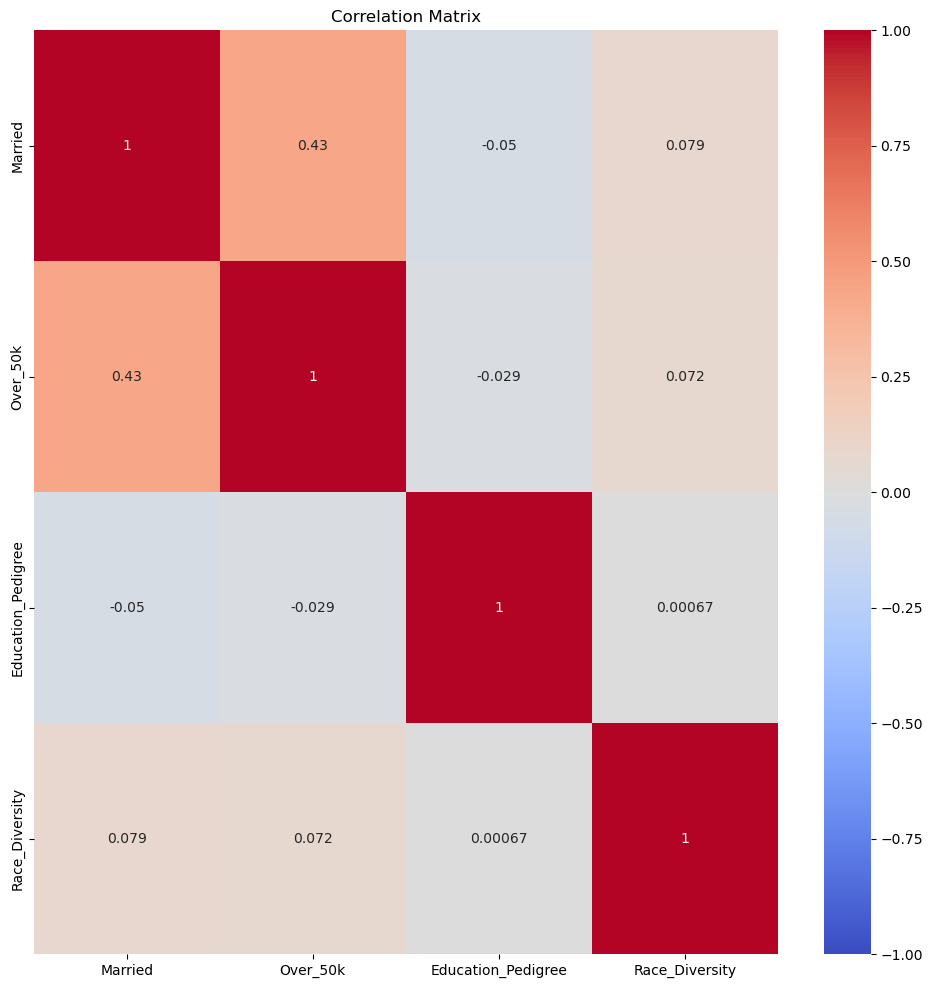

In [224]:
plt.figure(figsize= (12,12))
sns.heatmap(df.corr(), annot= True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title("Correlation Matrix")
plt.show()

In [226]:
#fit / train the logistic regression

logit_model = smf.logit('Married ~ Education_Pedigree + Over_50k + Race_Diversity', data=df)

In [228]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.587628
         Iterations 6


In [230]:
#print stat summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Married   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32557
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1505
Time:                        10:51:49   Log-Likelihood:                -19134.
converged:                       True   LL-Null:                       -22524.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8726      0.064    -13.695      0.000      -0.998      -0.748
Education_Pedigree    -0.1014      0.013     -8.063      0.000      -0.126      -0.077
Over_50k               2.4095      0.035     68.473      0.000       2.340       2.478
Race_Diversity         0.1390      0.015      9.364      0.000       0.110       0.168
======================================================================================
"""

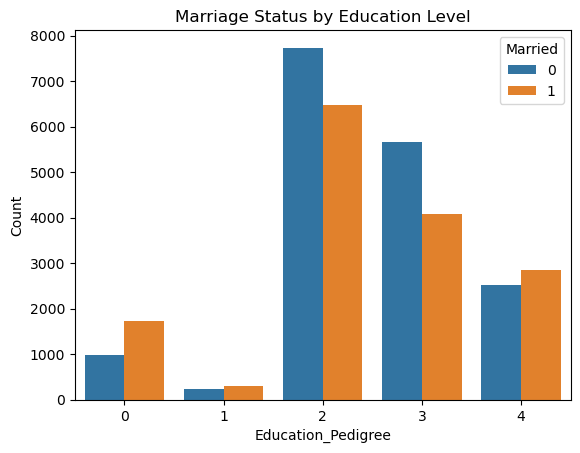

In [234]:
edu_marriage = df.groupby(["Education_Pedigree", "Married"]).size().reset_index(name="Count")
sns.barplot(data=edu_marriage, x="Education_Pedigree", y="Count", hue="Married")
plt.xticks(rotation=0)
plt.title("Marriage Status by Education Level")
plt.show()

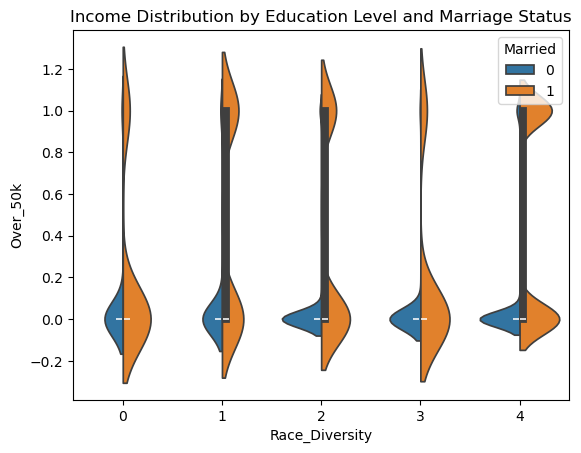

In [244]:
# Example: Income distribution by education level
sns.violinplot(data=df, x="Race_Diversity", y="Over_50k", hue="Married", split=True)

plt.title("Income Distribution by Education Level and Marriage Status")
plt.show()

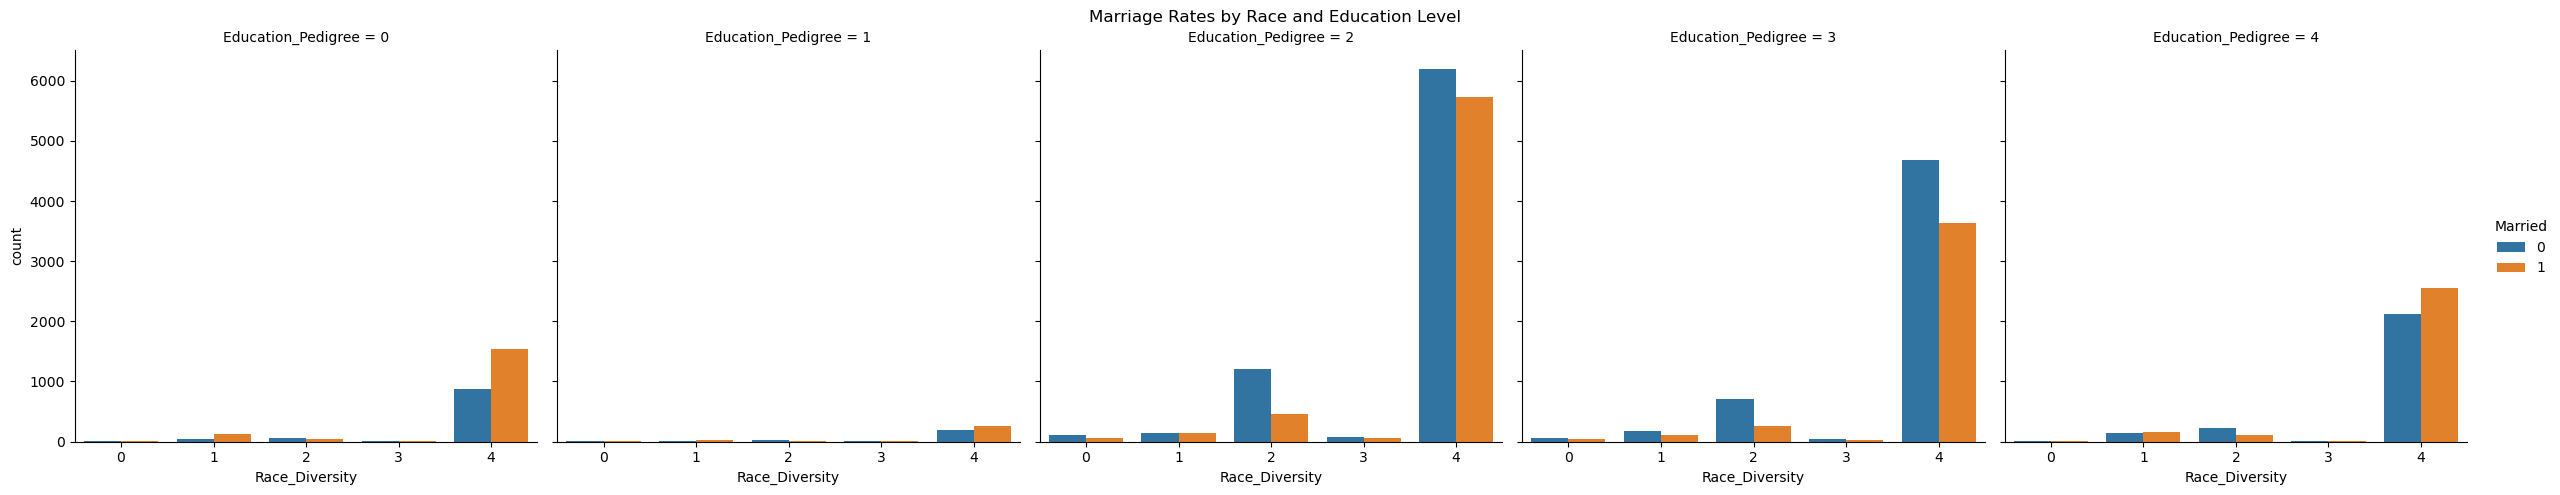

In [265]:
g = sns.catplot(data=df, x="Race_Diversity", hue="Married", col="Education_Pedigree", kind="count", height=5, aspect=1)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Marriage Rates by Race and Education Level")
plt.show()

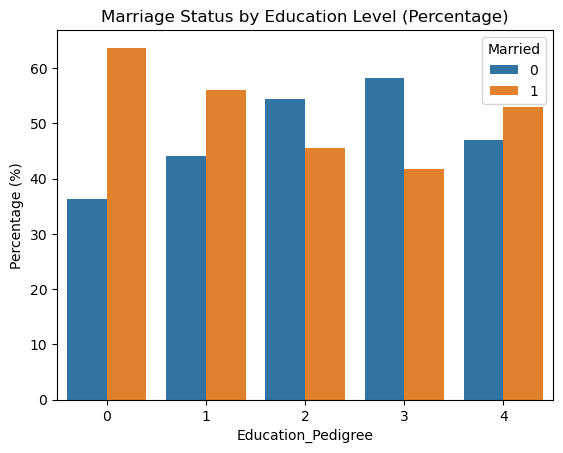

In [267]:
# Calculate counts
edu_marriage = df.groupby(["Education_Pedigree", "Married"]).size().reset_index(name="Count")

# Normalize counts to percentages within each 'Education_Pedigree'
edu_marriage['Percentage'] = edu_marriage.groupby("Education_Pedigree")['Count'].transform(lambda x: x / x.sum() * 100)

# Plot using percentages
sns.barplot(data=edu_marriage, x="Education_Pedigree", y="Percentage", hue="Married")
plt.xticks(rotation=0)
plt.title("Marriage Status by Education Level (Percentage)")
plt.ylabel("Percentage (%)")
plt.show()


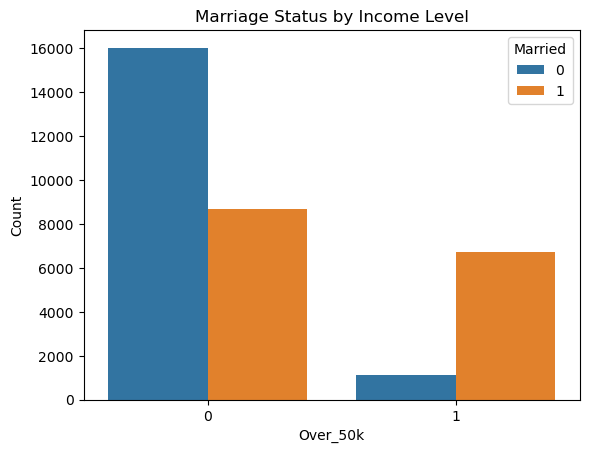

In [277]:
inc_marriage = df.groupby(["Over_50k", "Married"]).size().reset_index(name="Count")
sns.barplot(data=inc_marriage, x="Over_50k", y="Count", hue="Married")
plt.xticks(rotation=0)
plt.title("Marriage Status by Income Level")
plt.show()